## in-vehicle-copoun-Recommendation Data Set

In [1]:
# load the necessary packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
import tkinter
matplotlib.use('TkAgg')
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from kmodes.kmodes import KModes
from sklearn.metrics import completeness_score, homogeneity_score
import time

# Enable inline plotting
%matplotlib inline
plt.style.use('ggplot')

#### Load the data into pandas and explore the general characteristics

In [2]:
fileName = r'data/in-vehicle-coupon-recommendation.csv'
df = pd.read_csv(fileName, sep=',', na_values = ['?'])

# the first top 10 records
df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
# look at the last five records
df.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [4]:
#### DataFrame meta data

In [5]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [7]:
#### Transform the object data types to Categorical data types.

In [8]:
# df.select_dtypes(include=['object'])
inVechicle_obj = df.select_dtypes(include=['object']).copy() # get a copy of the object column names

# loop through the inVechicle_obj column names 
# and convert each column of the original data frame to the category data type  
for colName in inVechicle_obj.columns:
    df[colName] = df[colName].astype('category')
    
df.dtypes

destination             category
passanger               category
weather                 category
temperature                int64
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
car                     category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min           int64
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object

<p>There are 26 columns.</p>

In [9]:
df.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,...,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,...,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [10]:
#### unique values of the some of the categorical attributes

In [11]:
df['destination'].unique()

['No Urgent Place', 'Home', 'Work']
Categories (3, object): ['Home', 'No Urgent Place', 'Work']

In [12]:
df['passanger'].unique()

['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
Categories (4, object): ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']

In [13]:
df['weather'].unique()

['Sunny', 'Rainy', 'Snowy']
Categories (3, object): ['Rainy', 'Snowy', 'Sunny']

In [14]:
df['coupon'].unique()

['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)']
Categories (5, object): ['Bar', 'Carry out & Take away', 'Coffee House', 'Restaurant(20-50)', 'Restaurant(<20)']

In [15]:
df['car'].unique()

[NaN, 'Scooter and motorcycle', 'crossover', 'Mazda5', 'do not drive', 'Car that is too old to install Onstar :D']
Categories (5, object): ['Car that is too old to install Onstar :D', 'Mazda5', 'Scooter and motorcycle', 'crossover', 'do not drive']

In [16]:
df['Bar'].unique()

['never', 'less1', '1~3', 'gt8', NaN, '4~8']
Categories (5, object): ['1~3', '4~8', 'gt8', 'less1', 'never']

In [17]:
df['CoffeeHouse'].unique()

['never', 'less1', '4~8', '1~3', 'gt8', NaN]
Categories (5, object): ['1~3', '4~8', 'gt8', 'less1', 'never']

In [18]:
df['occupation'].unique()

['Unemployed', 'Architecture & Engineering', 'Student', 'Education&Training&Library', 'Healthcare Support', ..., 'Protective Service', 'Food Preparation & Serving Related', 'Production Occupations', 'Building & Grounds Cleaning & Maintenance', 'Farming Fishing & Forestry']
Length: 25
Categories (25, object): ['Architecture & Engineering', 'Arts Design Entertainment Sports & Media', 'Building & Grounds Cleaning & Maintenance', 'Business & Financial', ..., 'Sales & Related', 'Student', 'Transportation & Material Moving', 'Unemployed']

In [19]:
df.select_dtypes('int64').nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

<p>We learn that toCoupon_GEQ5min has one unique value, which will not be beneficial to our analysis so we shall have to drop that attribute.</p>

#### Let's find out if we have any missing values

In [20]:
df.isnull()[0:10]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [21]:
#### determining the number of missing values in each column
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

<p>Car, Bar, CoffeeHouse CarryAway,RestaurantLessThan20 and Restaurant20To50 have missing values.</p>

In [22]:
#### let's look at the percentages of missing values
df_na_sum = df.isna().sum()   # derive the number of missing values
df_na_sum[df_na_sum > 0]/len(df)  # let's do a subselection and only extract out where the values are greater than 0

car                     0.991485
Bar                     0.008436
CoffeeHouse             0.017108
CarryAway               0.011905
RestaurantLessThan20    0.010249
Restaurant20To50        0.014901
dtype: float64

In [23]:
#### Drop the car attribute since it is 99% empty
df_ver1 = df.drop(columns='car', axis = 1) 

## Drop rows with NAs

In [24]:
df_ver2 = df_ver1.dropna()
df_ver2.shape

(12079, 25)

<p>Dropped all rows with missing values</p>

In [25]:
# check if there are still any missing values (NAs)
df_ver2.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

#### let's summarize the class distributiondf.values

In [26]:
# extract the last column, wich is the target class label
classLabel = df_ver2.values[:, -1]
classCollection = Counter(classLabel) 

for key, value in classCollection.items():
    percentDist = value / len(classLabel) * 100
    print('classLabel=%s, Count=%s, PercentDistribution=%s%%' %(key, value, round(percentDist,2)))

classLabel=1, Count=6877, PercentDistribution=56.93%
classLabel=0, Count=5202, PercentDistribution=43.07%


<p>We learn that attribute Y consists of two classes whose distribution amongest the data set is shown above.</p>

#### Distribution charts of all the categorical data types

In [27]:
df_ver2.select_dtypes('category').columns

Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income',
       'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')

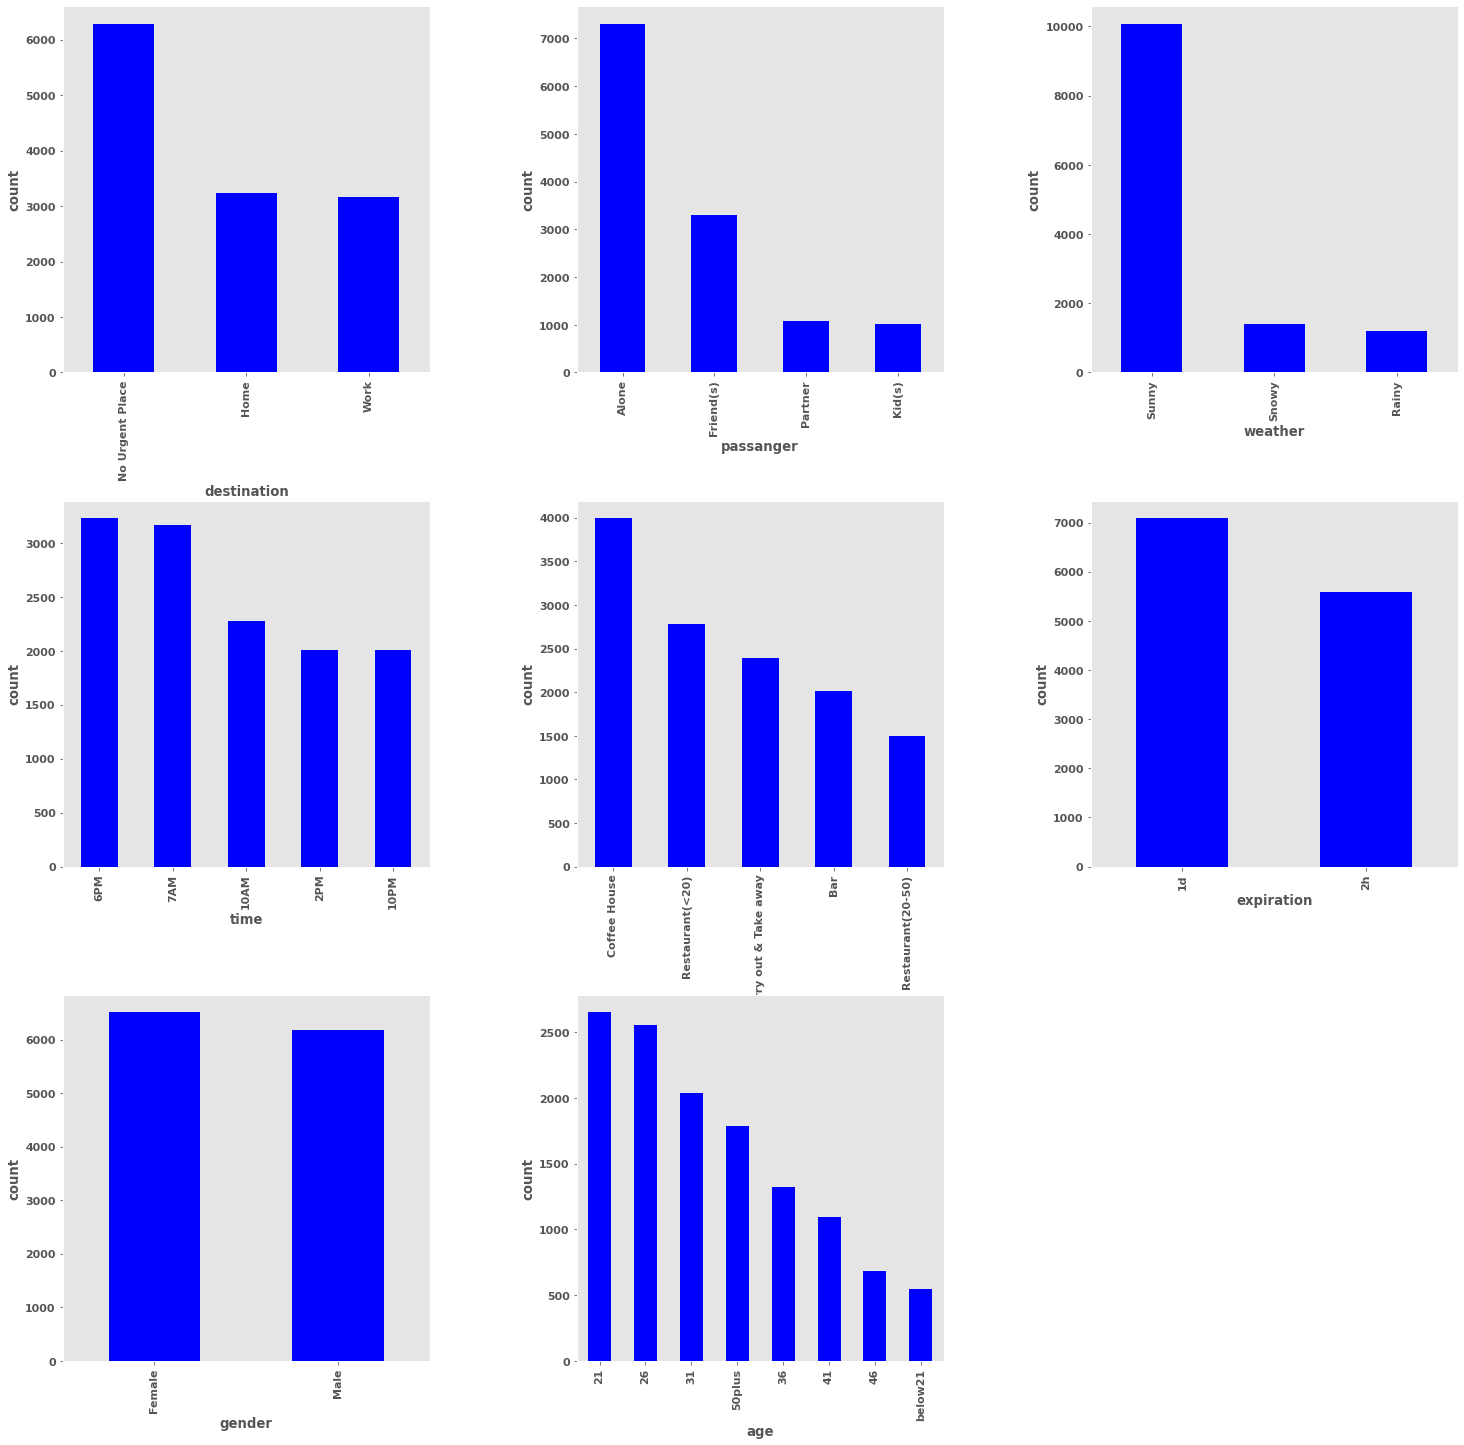

In [28]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top.


fig = plt.figure(figsize=(25, 5)) # set the size of the container
fig.subplots_adjust(bottom = -7.0, wspace = 0.4, hspace = 0.35) # add space between each row of the subplots

inVechCategorical_df = df_ver2.select_dtypes(include=['category']).copy()
# extract out all the column names
categorical_attrs = inVechCategorical_df.columns

axisnum = 0
#type(categorical_attrs)
for i in range(len(categorical_attrs)-9):
    #print(categorical_attrs[i])
    
    axisnum += 1
    ax = fig.add_subplot(6, 3, axisnum)
    
    

    df[categorical_attrs[i]].value_counts().plot(kind = 'bar', grid = False, color=['blue'], xlabel = categorical_attrs[i], ylabel = 'count')

       
plt.show()

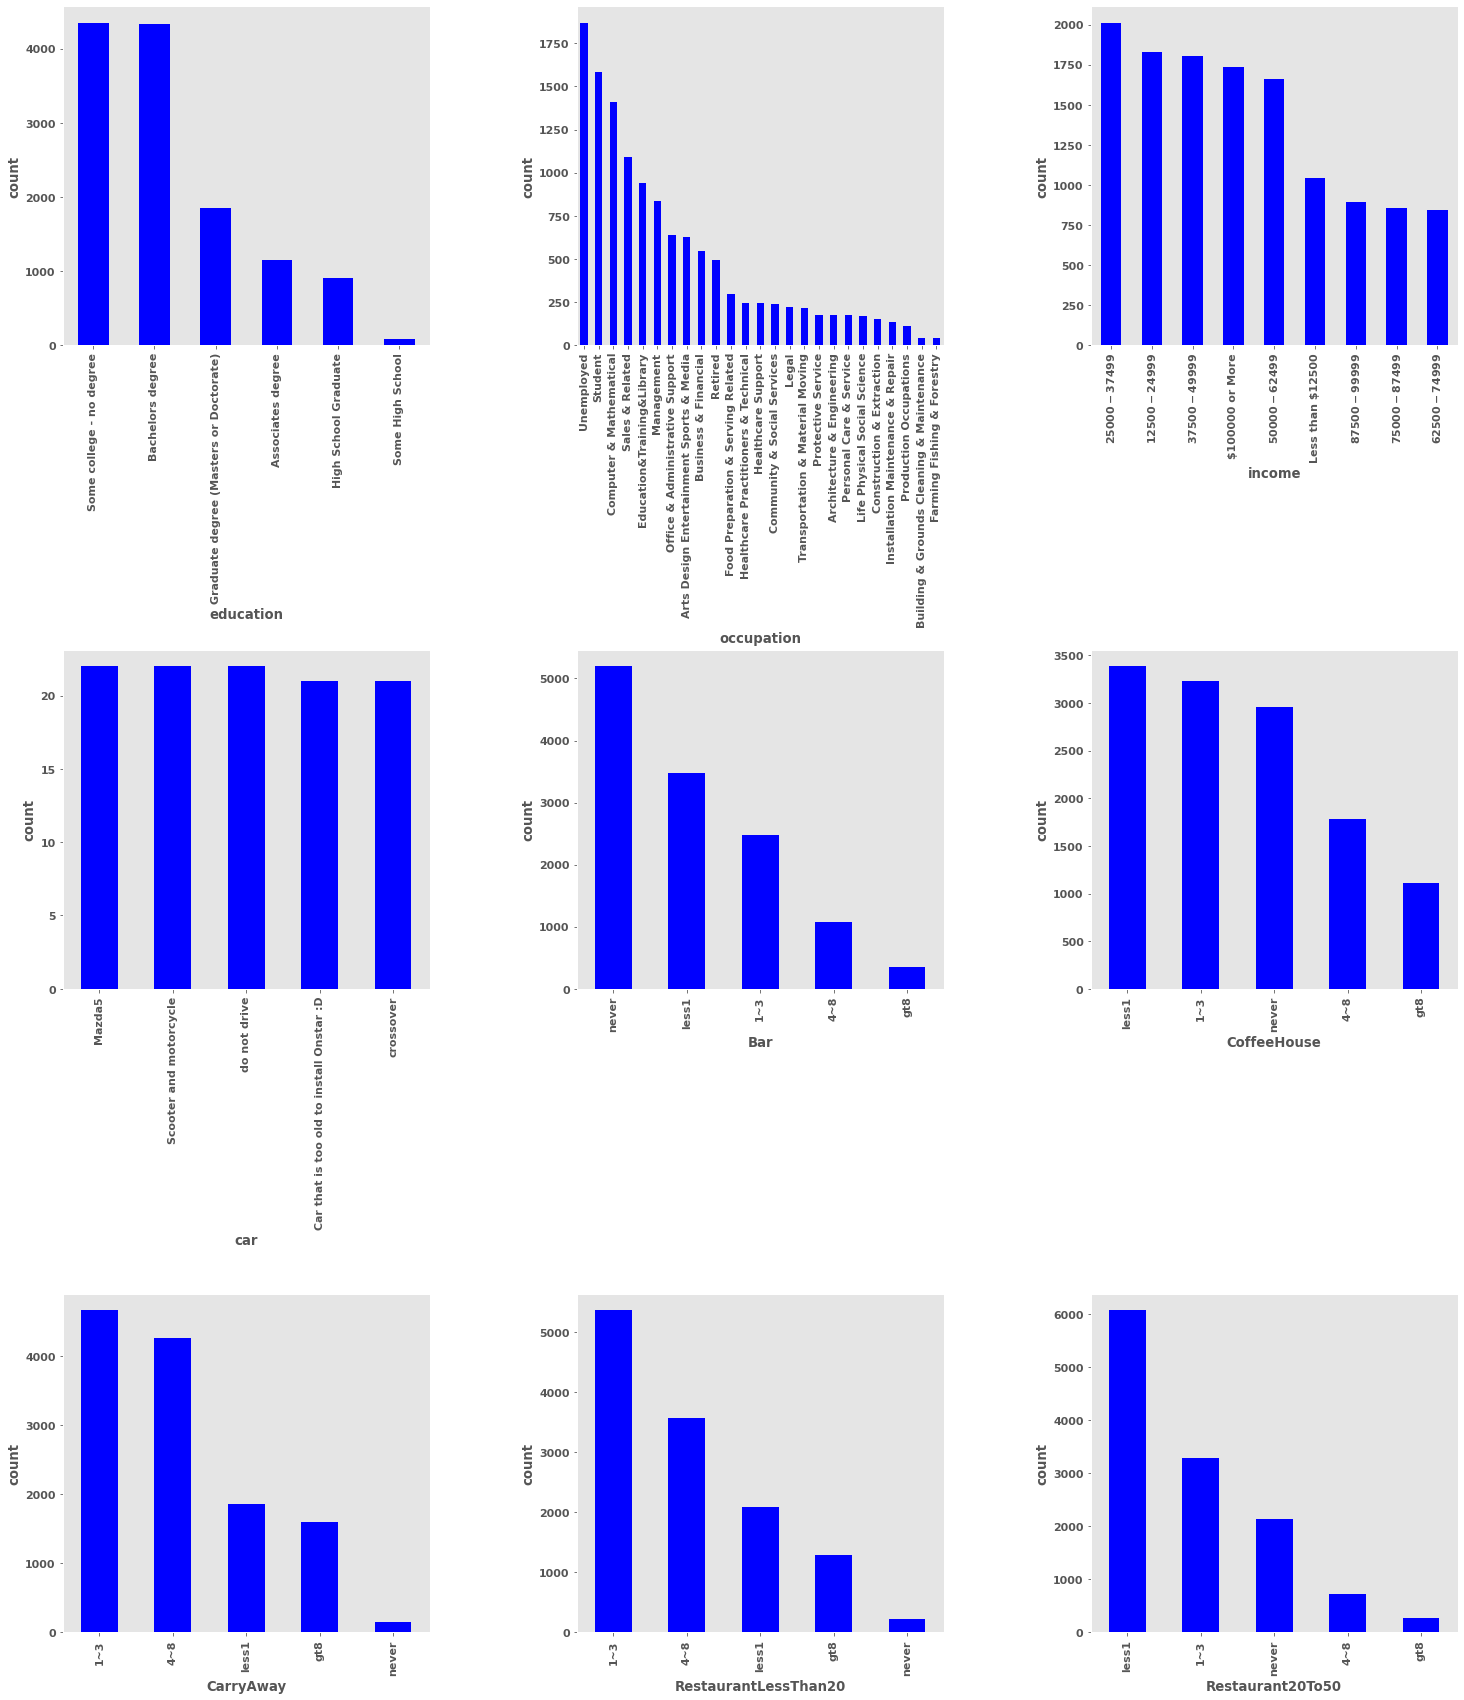

In [29]:
 CategoricalRe = ['education', 'occupation', 'income','car', 'Bar'
                  , 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50']
    
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top.

fig = plt.figure(figsize=(25, 5)) # set the size of the container
fig.subplots_adjust(bottom = -9, wspace = 0.4, hspace = 0.9) # add space between each row of the subplots

#inVechCategorical_df = df.select_dtypes(include=['category']).copy()
# extract out all the column names
#categorical_attrs = inVechCategorical_df.columns
axisnum = 0
#type(categorical_attrs)
for i in range(len(CategoricalRe)):
    #print(categorical_attrs[i])
    
    axisnum += 1
    ax = fig.add_subplot(6, 3, axisnum)
    df[CategoricalRe[i]].value_counts().plot(kind = 'bar', grid = False, color=['blue'], xlabel = CategoricalRe[i], ylabel = 'count')
plt.show()
    
    

In [30]:
all_attrs_subselection = df_ver2.drop('Y', axis=1).columns
all_attrs_subselection

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp'],
      dtype='object')

Y,0,1
education,,
Some college - no degree,1711,2508
Bachelors degree,1784,2237
Graduate degree (Masters or Doctorate),856,952
Associates degree,470,596
High School Graduate,356,521
Some High School,25,63


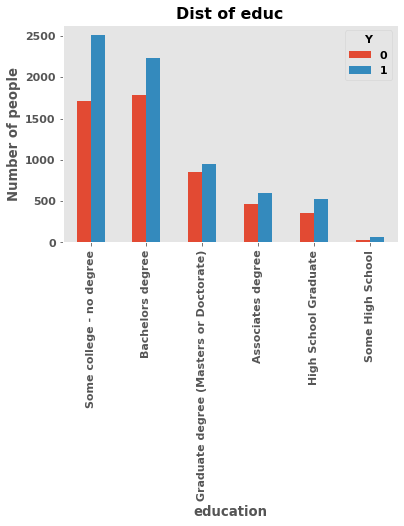

In [31]:
df_education = pd.crosstab(df_ver2.education, df_ver2.Y)
df_educationSorted = df_education.sort_values(1, ascending = False)
df_educationSorted.plot(kind = 'bar', xlabel = 'education', ylabel = 'Number of people', grid = False, title = 'Dist of educ');
df_educationSorted

<p>Some college - no degree category had the highest number of people who accepted a coupon. Also, we observe that they are a less number of high schoolers that accepted a coupon. </p>

Y,0,1
destination,,
No Urgent Place,2185,3785
Home,1517,1568
Work,1500,1524


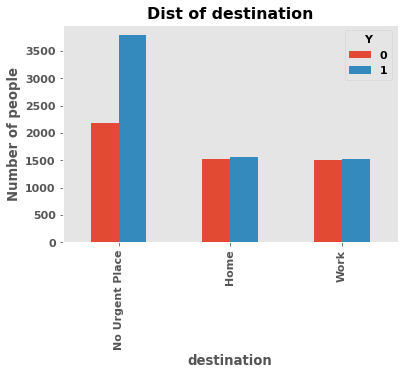

In [32]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_dest = pd.crosstab(df_ver2.destination, df_ver2.Y)
df_destSorted = df_dest.sort_values(1, ascending = False)
df_destSorted.plot(kind = 'bar', xlabel = 'destination', ylabel = 'Number of people', grid = False, title = 'Dist of destination');
df_destSorted

#### The bar charts above show the distribution of the categorical frequencies in our data set. 
<p>In the destination bar chart when you look at the number of people that accepted a coupon, all those folks whose destination was in the <strong>No urgent Place </stronG>category had the highest number of frequency when compared with Home and Work destination categories. <p>


Y,0,1
weather,,
Sunny,3888,5713
Snowy,697,634
Rainy,617,530


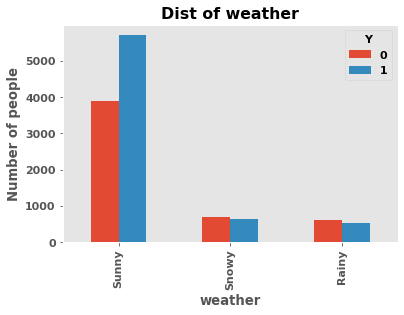

In [33]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_weather = pd.crosstab(df_ver2.weather, df_ver2.Y)
df_weatherSorted = df_weather.sort_values(1, ascending = False)
df_weatherSorted.plot(kind = 'bar', xlabel = 'weather', ylabel = 'Number of people', grid = False, title = 'Dist of weather');
df_weatherSorted

<p>Looking at the Dist of Weather bar chart, they were more people that accepted a coupon on a sunny day compared to Rainy and Snowy days.</p>

Y,0,1
temperature,,
80,2491,3731
55,1695,1967
30,1016,1179


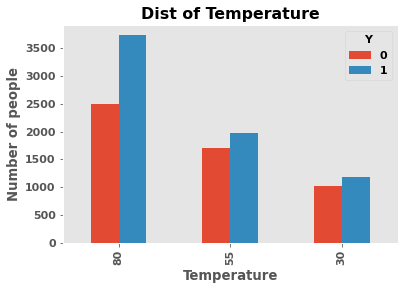

In [34]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_temperature = pd.crosstab(df_ver2.temperature, df_ver2.Y)
df_temperatureSorted = df_temperature.sort_values(1, ascending = False)
df_temperatureSorted.plot(kind = 'bar', xlabel = 'Temperature', ylabel = 'Number of people', grid = False, title = 'Dist of Temperature');
df_temperatureSorted

<p>We learn that when the temperature was high, in the 80s, they were more people that accepted a coupon.</p>

Y,0,1
time,,
6PM,1284,1794
7AM,1500,1524
10AM,846,1312
2PM,650,1266
10PM,922,981


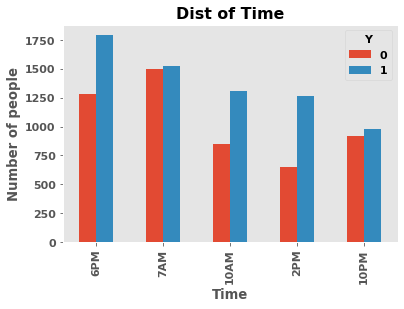

In [35]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_time = pd.crosstab(df_ver2.time, df_ver2.Y)
df_timeSorted = df_time.sort_values(1, ascending = False)
df_timeSorted.plot(kind = 'bar', xlabel = 'Time', ylabel = 'Number of people', grid = False, title = 'Dist of Time');
df_timeSorted

<p>Amongst the different times of the day, 6pm had the highest number of people who accepted a coupon.</p>

Y,0,1
expiration,,
1d,2516,4244
2h,2686,2633


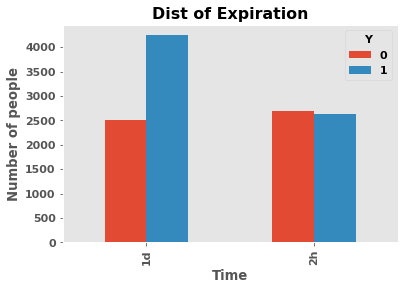

In [36]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_expiration = pd.crosstab(df_ver2.expiration, df_ver2.Y)
df_expiration.plot(kind = 'bar', xlabel = 'Time', ylabel = 'Number of people', grid = False, title = 'Dist of Expiration');
df_expiration

<p>Amajority of the coupons issued were expiring within 1 day. </p>

Y,0,1
gender,,
Female,2805,3394
Male,2397,3483


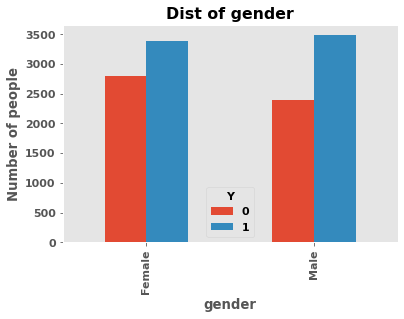

In [37]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_gender = pd.crosstab(df_ver2.gender, df_ver2.Y)
df_gender.plot(kind = 'bar', xlabel = 'gender', ylabel = 'Number of people', grid = False, title = 'Dist of gender');
df_gender

<p>Compared to males, they were more females that accepted a coupon.<p>

Y,0,1
maritalStatus,,
Single,1788,2800
Married partner,2208,2623
Unmarried partner,910,1138
Divorced,239,265
Widowed,57,51


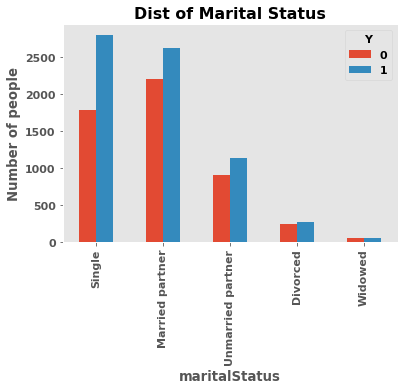

In [38]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_maritalStatus = pd.crosstab(df_ver2.maritalStatus, df_ver2.Y)
df_maritalStatusSorted = df_maritalStatus.sort_values(1, ascending = False)
df_maritalStatusSorted.plot(kind = 'bar', xlabel = 'maritalStatus', ylabel = 'Number of people', grid = False, title = 'Dist of Marital Status');
df_maritalStatusSorted

<p>A good number of singles accepted a coupon.</p>

Y,0,1
has_children,,
0,2935,4210
1,2267,2667


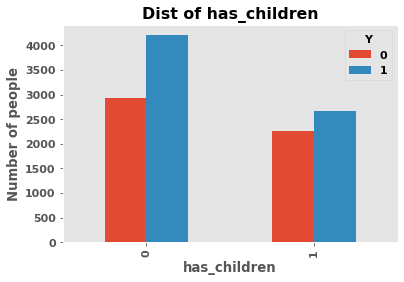

In [39]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_haschildren = pd.crosstab(df_ver2.has_children, df_ver2.Y)
df_haschildren.plot(kind = 'bar', xlabel = 'has_children', ylabel = 'Number of people', grid = False, title = 'Dist of has_children');
df_haschildren

<p>The number of people without children accepted more coupons than those with children.</p>

Y,0,1
occupation,,
Unemployed,824,990
Student,586,911
Computer & Mathematical,597,771
Sales & Related,468,604
Management,314,458
Education&Training&Library,416,439
Office & Administrative Support,245,372
Arts Design Entertainment Sports & Media,263,301
Business & Financial,222,294


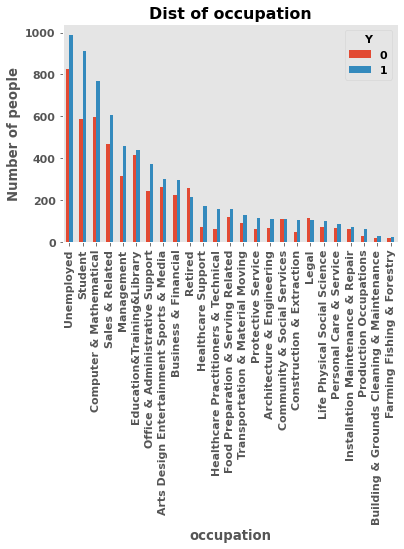

In [40]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_occupation = pd.crosstab(df_ver2.occupation, df_ver2.Y)
df_occupationSorted = df_occupation.sort_values(1, ascending = False)
df_occupationSorted.plot(kind = 'bar', xlabel = 'occupation', ylabel = 'Number of people', grid = False, title = 'Dist of occupation');
df_occupationSorted

<p>Compared to other occupations,the unemployed accepted more coupons.</p>

Y,0,1
income,,
$25000 - $37499,773,1146
$12500 - $24999,730,998
$100000 or More,714,978
$37500 - $49999,725,964
$50000 - $62499,642,923
Less than $12500,418,596
$62500 - $74999,397,443
$87500 - $99999,390,428
$75000 - $87499,413,401


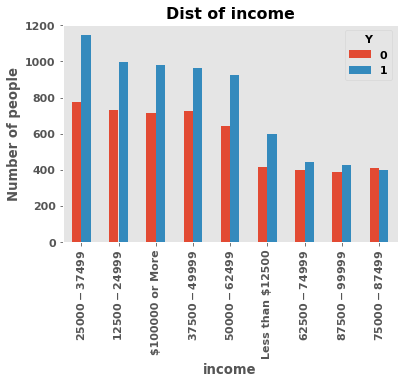

In [41]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_income = pd.crosstab(df_ver2.income, df_ver2.Y)
df_incomeSorted = df_income.sort_values(1, ascending = False)
df_incomeSorted.plot(kind = 'bar', xlabel = 'income', ylabel = 'Number of people', grid = False, title = 'Dist of income');
df_incomeSorted

Y,0,1
Bar,,
never,2325,2609
less1,1465,1929
1~3,889,1481
4~8,382,672
gt8,141,186


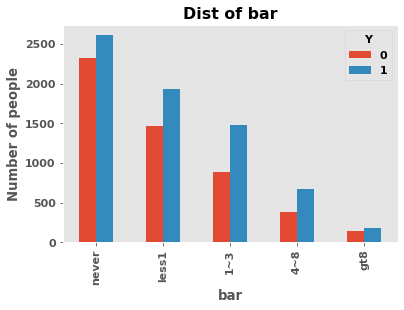

In [42]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_Bar = pd.crosstab(df_ver2.Bar, df_ver2.Y)
df_BarSorted = df_Bar.sort_values(1, ascending = False)
df_BarSorted.plot(kind = 'bar', xlabel = 'bar', ylabel = 'Number of people', grid = False, title = 'Dist of bar');
df_BarSorted

<p>The biggest number of people who never visted a bar received more coupons compared to those that visit it less than once or 1 to 3 times or 4 to 8 times.</p>

Y,0,1
Bar,,
never,2325,2609
less1,1465,1929
1~3,889,1481
4~8,382,672
gt8,141,186


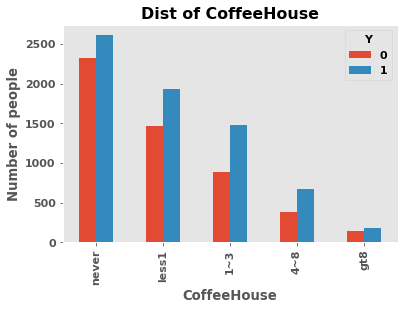

In [43]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_CoffeeHouse = pd.crosstab(df_ver2.CoffeeHouse, df_ver2.Y)
df_CoffeeHouseSorted = df_Bar.sort_values(1, ascending = False)
df_CoffeeHouseSorted.plot(kind = 'bar', xlabel = 'CoffeeHouse', ylabel = 'Number of people', grid = False, title = 'Dist of CoffeeHouse');
df_CoffeeHouseSorted

<p>Comment on the above chart</p>

Y,0,1
CarryAway,,
1~3,1879,2623
4~8,1713,2370
gt8,660,913
less1,891,899
never,59,72


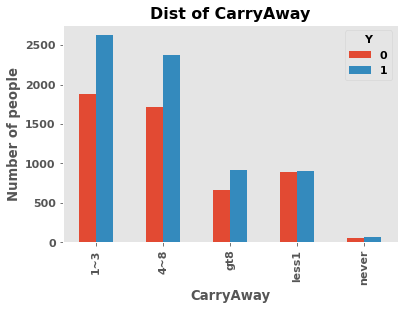

In [44]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_CarryAway = pd.crosstab(df_ver2.CarryAway, df_ver2.Y)
df_CarryAwaySorted = df_CarryAway.sort_values(1, ascending = False)
df_CarryAwaySorted.plot(kind = 'bar', xlabel = 'CarryAway', ylabel = 'Number of people', grid = False, title = 'Dist of CarryAway');
df_CarryAwaySorted

<p>Comment above graph</p>

Y,0,1
RestaurantLessThan20,,
1~3,2261,2902
4~8,1438,2012
less1,926,1079
gt8,504,781
never,73,103


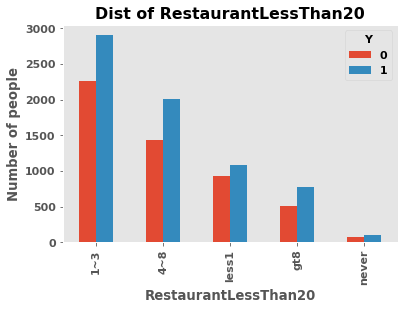

In [45]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top
df_RestaurantLessThan20 = pd.crosstab(df_ver2.RestaurantLessThan20, df_ver2.Y)
df_RestaurantLessThan20Sorted = df_RestaurantLessThan20.sort_values(1, ascending = False)
df_RestaurantLessThan20Sorted.plot(kind = 'bar', xlabel = 'RestaurantLessThan20', ylabel = 'Number of people', grid = False, title = 'Dist of RestaurantLessThan20');
df_RestaurantLessThan20Sorted

<p>Comment above bar chart</p>

Y,0,1
Restaurant20To50,,
less1,2587,3272
1~3,1289,1913
never,1000,1070
4~8,237,447
gt8,89,175


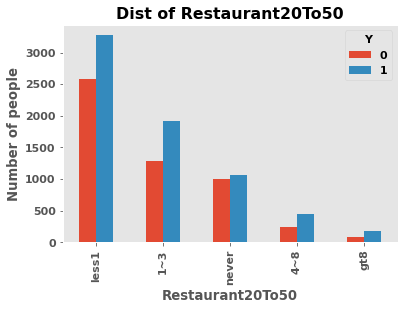

In [46]:
df_Restaurant20To50 = pd.crosstab(df_ver2.Restaurant20To50, df_ver2.Y)
df_Restaurant20To50Sorted = df_Restaurant20To50.sort_values(1, ascending = False)
df_Restaurant20To50Sorted.plot(kind = 'bar', xlabel = 'Restaurant20To50', ylabel = 'Number of people', grid = False, title = 'Dist of Restaurant20To50');
df_Restaurant20To50Sorted

<p>Comment the above bar chart.</p>

Y,0,1
toCoupon_GEQ5min,,
1,5202,6877


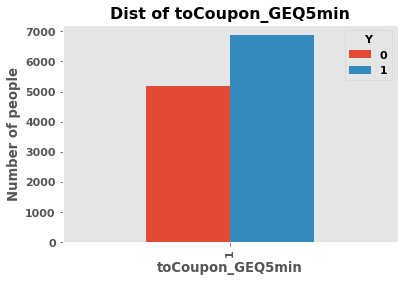

In [47]:
df_toCoupon_GEQ5min = pd.crosstab(df_ver2.toCoupon_GEQ5min, df_ver2.Y)
df_toCoupon_GEQ5minSorted = df_toCoupon_GEQ5min.sort_values(1, ascending = False)
df_toCoupon_GEQ5minSorted.plot(kind = 'bar', xlabel = 'toCoupon_GEQ5min', ylabel = 'Number of people', grid = False, title = 'Dist of toCoupon_GEQ5min');
df_toCoupon_GEQ5minSorted

<p>Comment on the above chart</p>

Y,0,1
toCoupon_GEQ15min,,
1,3162,3617
0,2040,3260


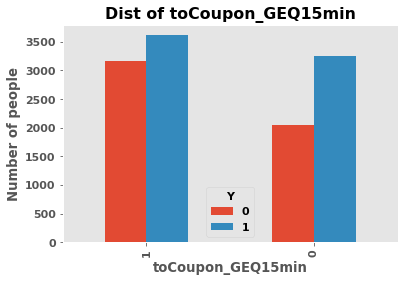

In [48]:
df_toCoupon_GEQ15min = pd.crosstab(df_ver2.toCoupon_GEQ15min, df_ver2.Y)
df_toCoupon_GEQ15minSorted = df_toCoupon_GEQ15min.sort_values(1, ascending = False)
df_toCoupon_GEQ15minSorted.plot(kind = 'bar', xlabel = 'toCoupon_GEQ15min', ylabel = 'Number of people', grid = False, title = 'Dist of toCoupon_GEQ15min');
df_toCoupon_GEQ15minSorted

<p>Comment on the above bar chart.</p>

Y,0,1
toCoupon_GEQ15min,,
1,3162,3617
0,2040,3260


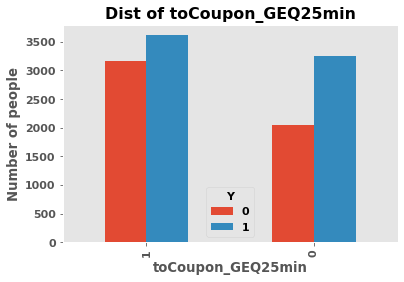

In [49]:
df_toCoupon_GEQ25min = pd.crosstab(df_ver2.toCoupon_GEQ25min, df_ver2.Y)
df_toCoupon_GEQ25minSorted = df_toCoupon_GEQ15min.sort_values(1, ascending = False)
df_toCoupon_GEQ25minSorted.plot(kind = 'bar', xlabel = 'toCoupon_GEQ25min', ylabel = 'Number of people', grid = False, title = 'Dist of toCoupon_GEQ25min');
df_toCoupon_GEQ25minSorted

<p>Comment on the above bar chart</p>

Y,0,1
direction_same,,
0,4118,5362
1,1084,1515


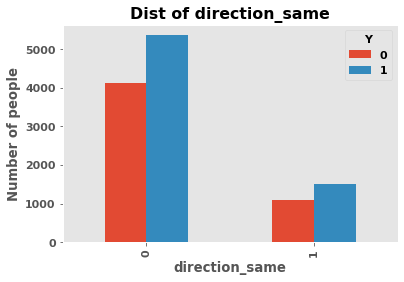

In [50]:
df_direction_same = pd.crosstab(df_ver2.direction_same, df_ver2.Y)
df_direction_sameSorted = df_direction_same.sort_values(1, ascending = False)
df_direction_sameSorted.plot(kind = 'bar', xlabel = 'direction_same', ylabel = 'Number of people', grid = False, title = 'Dist of direction_same');
df_direction_sameSorted

<p>Comment on the above</p>

Y,0,1
direction_opp,,
1,4118,5362
0,1084,1515


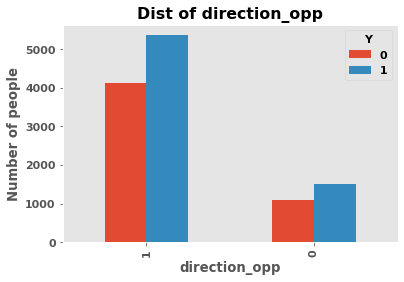

In [51]:
df_direction_opp = pd.crosstab(df_ver2.direction_opp, df_ver2.Y)
df_direction_oppSorted = df_direction_opp.sort_values(1, ascending = False)
df_direction_oppSorted.plot(kind = 'bar', xlabel = 'direction_opp', ylabel = 'Number of people', grid = False, title = 'Dist of direction_opp');
df_direction_oppSorted

<p>Commen on the above.</p>

Y,0,1
age,,
21,1030,1507
26,960,1439
31,862,1063
50plus,853,879
36,578,675
41,453,612
46,281,383
below21,185,319


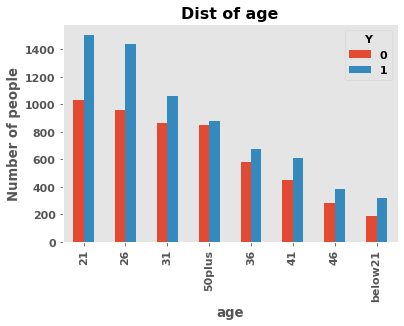

In [52]:
df_age = pd.crosstab(df_ver2.age, df_ver2.Y)
df_ageSorted = df_age.sort_values(1, ascending = False)
df_ageSorted.plot(kind = 'bar', xlabel = 'age', ylabel = 'Number of people', grid = False, title = 'Dist of age');
df_ageSorted

<p>When compared to other ages, the number of 21 year olds that accepted a coupon was the highest.</p>

# Transforming the Data 

###### Take a copy of the second version of our data set.

In [53]:
df.is_copy = False
df_ver3 = df_ver2.copy()

In [54]:

df_ver3.loc[df_ver3.time == '7AM', 'timec'] = 0
df_ver3.loc[df_ver3.time == '10AM', 'timec'] = 1
df_ver3.loc[df_ver3.time == '2PM',  'timec'] = 2
df_ver3.loc[df_ver3.time == '6PM', 'timec'] = 3
df_ver3.loc[df_ver3.time == '10PM', 'timec'] = 4

In [55]:
# df_ver3.loc[df_ver3.maritalStatus == 'Unmarried partner', 'maritalStatusc'] = 'Unmarried'
# df_ver3.loc[df_ver3.maritalStatus == 'Divorced', 'maritalStatusc'] = 'Unmarried'
# df_ver3.loc[df_ver3.maritalStatus == 'Widowed', 'maritalStatusc'] = 'Unmarried'
# df_ver3.loc[df_ver3.maritalStatus == 'Married partner', 'maritalStatusc'] = 'Married partner'

In [56]:
# df_ver3['maritalStatus'].value_counts()

In [57]:
df_ver3.loc[df_ver3.age == 'below21', 'agec'] = 0
df_ver3.loc[df_ver3.age == '21', 'agec'] = 1
df_ver3.loc[df_ver3.age == '26', 'agec'] = 2
df_ver3.loc[df_ver3.age == '31', 'agec'] = 3
df_ver3.loc[df_ver3.age == '36', 'agec'] = 4
df_ver3.loc[df_ver3.age == '41', 'agec'] = 5
df_ver3.loc[df_ver3.age == '46', 'agec'] = 6
df_ver3.loc[df_ver3.age == '50plus', 'agec'] = 7

In [58]:
df_ver3.loc[df_ver3.income == 'Less than $12500', 'incomec'] = 0
df_ver3.loc[df_ver3.income == '$12500 - $24999', 'incomec'] = 1
df_ver3.loc[df_ver3.income == '$25000 - $37499', 'incomec'] = 2

df_ver3.loc[df_ver3.income == '$37500 - $49999', 'incomec'] = 3
df_ver3.loc[df_ver3.income == '$50000 - $62499', 'incomec'] = 4
df_ver3.loc[df_ver3.income == '$62500 - $74999', 'incomec'] = 5

df_ver3.loc[df_ver3.income == '$75000 - $87499', 'incomec'] = 6
df_ver3.loc[df_ver3.income == '$87500 - $99999', 'incomec'] = 7
df_ver3.loc[df_ver3.income == '$100000 or More', 'incomec'] = 8

In [59]:
df_ver3.loc[df_ver3.Restaurant20To50 == 'never', 'Restaurant20To50c'] = 0
df_ver3.loc[df_ver3.Restaurant20To50 == 'less1', 'Restaurant20To50c'] = 1
df_ver3.loc[df_ver3.Restaurant20To50 == '1~3', 'Restaurant20To50c'] = 2
df_ver3.loc[df_ver3.Restaurant20To50 == '4~8', 'Restaurant20To50c'] = 3
df_ver3.loc[df_ver3.Restaurant20To50 == 'gt8', 'Restaurant20To50c'] = 4

In [60]:
df_ver3.loc[df_ver3.RestaurantLessThan20 == 'never', 'RestaurantLessThan20c'] = 0
df_ver3.loc[df_ver3.RestaurantLessThan20 == 'less1', 'RestaurantLessThan20c'] = 1
df_ver3.loc[df_ver3.RestaurantLessThan20 == '1~3', 'RestaurantLessThan20c'] = 2
df_ver3.loc[df_ver3.RestaurantLessThan20 == '4~8', 'RestaurantLessThan20c'] = 3
df_ver3.loc[df_ver3.RestaurantLessThan20 == 'gt8', 'RestaurantLessThan20c'] = 4

In [61]:
df_ver3.loc[df_ver3.CarryAway == 'never', 'CarryAwayc'] = 0
df_ver3.loc[df_ver3.CarryAway == 'less1', 'CarryAwayc'] = 1
df_ver3.loc[df_ver3.CarryAway == '1~3', 'CarryAwayc'] = 2
df_ver3.loc[df_ver3.CarryAway == '4~8', 'CarryAwayc'] = 3
df_ver3.loc[df_ver3.CarryAway == 'gt8', 'CarryAwayc'] = 4

In [62]:
df_ver3.loc[df_ver3.CoffeeHouse == 'never', 'CoffeeHousec'] = 0
df_ver3.loc[df_ver3.CoffeeHouse == 'less1', 'CoffeeHousec'] = 1
df_ver3.loc[df_ver3.CoffeeHouse == '1~3', 'CoffeeHousec'] = 2
df_ver3.loc[df_ver3.CoffeeHouse == '4~8', 'CoffeeHousec'] = 3
df_ver3.loc[df_ver3.CoffeeHouse == 'gt8', 'CoffeeHousec'] = 4

In [63]:
df_ver3.loc[df_ver3.Bar == 'never', 'Barc'] = 0
df_ver3.loc[df_ver3.Bar == 'less1', 'Barc'] = 1
df_ver3.loc[df_ver3.Bar == '1~3', 'Barc'] = 2
df_ver3.loc[df_ver3.Bar == '4~8', 'Barc'] = 3
df_ver3.loc[df_ver3.Bar == 'gt8', 'Barc'] = 4

In [64]:
df_ver3.loc[df_ver3.education == 'Some High School', 'educationc'] = 0
df_ver3.loc[df_ver3.education == 'High School Graduate', 'educationc'] = 1
df_ver3.loc[df_ver3.education == 'Some college - no degree', 'educationc'] = 2
df_ver3.loc[df_ver3.education == 'Associates degree', 'educationc'] = 3
df_ver3.loc[df_ver3.education == 'Bachelors degree', 'educationc'] = 4
df_ver3.loc[df_ver3.education == 'Graduate degree (Masters or Doctorate)', 'educationc'] = 5

In [65]:
df_ver3.loc[df_ver3.temperature == 30 , 'temperaturec'] = 0
df_ver3.loc[df_ver3.temperature == 55 , 'temperaturec'] = 1
df_ver3.loc[df_ver3.temperature == 80 , 'temperaturec'] = 2

##### Drop the old columns.

In [66]:
old_ColumnsToBeDropped = ['time', 'age', 'income', 'Restaurant20To50'
                          , 'RestaurantLessThan20', 'CarryAway', 'CoffeeHouse'
                          , 'Bar', 'education', 'temperature'
                         ]

df_versColumns = df_ver3.drop(old_ColumnsToBeDropped, axis = 1, inplace = True) # drop the columns and select columns
df_ver3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   destination            12079 non-null  category
 1   passanger              12079 non-null  category
 2   weather                12079 non-null  category
 3   coupon                 12079 non-null  category
 4   expiration             12079 non-null  category
 5   gender                 12079 non-null  category
 6   maritalStatus          12079 non-null  category
 7   has_children           12079 non-null  int64   
 8   occupation             12079 non-null  category
 9   toCoupon_GEQ5min       12079 non-null  int64   
 10  toCoupon_GEQ15min      12079 non-null  int64   
 11  toCoupon_GEQ25min      12079 non-null  int64   
 12  direction_same         12079 non-null  int64   
 13  direction_opp          12079 non-null  int64   
 14  Y                      12079 non-null

##### Rename the transformed columns using the original dropped column names .

In [67]:
replaceL = ['time', 'age', 'income', 'Restaurant20To50', 
            'RestaurantLessThan20', 'CarryAway', 'CoffeeHouse',
            'Bar', 'education', 'temperature']

replaceDict = {'timec' : 'time'
               , 'agec' : 'age'
               , 'incomec' : 'income'
               , 'Restaurant20To50c' : 'Restaurant20To50' 
               , 'RestaurantLessThan20c' : 'RestaurantLessThan20'
               , 'CarryAwayc' : 'CarryAway'
               , 'CoffeeHousec': 'CoffeeHouse'
               , 'Barc' : 'Bar'
               , 'educationc': 'education'
               , 'temperaturec': 'temperature'}

columnL = df_ver3.columns.to_list()
for i in range(len(columnL)):
    if replaceDict.get(columnL[i]) is not None: # look up the transformed columns and get their original names
        columnL[i] = replaceDict.get(columnL[i]) # replace the derived columns with the original names
        
# print(columnL)

# rename the columns using a list
df_ver3.columns = columnL

In [68]:
df_ver2['toCoupon_GEQ5min'].value_counts()

1    12079
Name: toCoupon_GEQ5min, dtype: int64

<p>toCoupon_GEQ5min column has no meaning since its only unique value is 1 so it needs to be dropped.</p>

In [69]:
df_ver3.drop('toCoupon_GEQ5min', axis = 1, inplace = True)

##### change time, age, income, Restaurant20To50, RestaurantLessThan20, CarryAway, CoffeeHouse, Bar, education, and temperature's data type to numeric. 

In [70]:
columnsL = ['time', 'age', 'income', 'Restaurant20To50', 'RestaurantLessThan20', 'CarryAway', 'CoffeeHouse', 'Bar', 'education', 'temperature']
for i in range(len(columnsL)):
    df_ver3[[columnsL[i]]] = df_ver3[[columnsL[i]]].astype(int)

In [71]:
df_ver3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12079 non-null  category
 1   passanger             12079 non-null  category
 2   weather               12079 non-null  category
 3   coupon                12079 non-null  category
 4   expiration            12079 non-null  category
 5   gender                12079 non-null  category
 6   maritalStatus         12079 non-null  category
 7   has_children          12079 non-null  int64   
 8   occupation            12079 non-null  category
 9   toCoupon_GEQ15min     12079 non-null  int64   
 10  toCoupon_GEQ25min     12079 non-null  int64   
 11  direction_same        12079 non-null  int64   
 12  direction_opp         12079 non-null  int64   
 13  Y                     12079 non-null  int64   
 14  time                  12079 non-null  int32   
 15  a

In [72]:
df_ver3.head()

,destination,passanger,weather,coupon,expiration,gender,maritalStatus,has_children,occupation,toCoupon_GEQ15min,...,time,age,income,Restaurant20To50,RestaurantLessThan20,CarryAway,CoffeeHouse,Bar,education,temperature
22,No Urgent Place,Alone,Sunny,Restaurant(<20),1d,Male,Single,0,Architecture & Engineering,0,...,2,1,5,1,3,3,1,0,4,1
23,No Urgent Place,Friend(s),Sunny,Coffee House,2h,Male,Single,0,Architecture & Engineering,0,...,1,1,5,1,3,3,1,0,4,2
24,No Urgent Place,Friend(s),Sunny,Bar,1d,Male,Single,0,Architecture & Engineering,0,...,1,1,5,1,3,3,1,0,4,2
25,No Urgent Place,Friend(s),Sunny,Carry out & Take away,2h,Male,Single,0,Architecture & Engineering,1,...,1,1,5,1,3,3,1,0,4,2
26,No Urgent Place,Friend(s),Sunny,Coffee House,1d,Male,Single,0,Architecture & Engineering,0,...,2,1,5,1,3,3,1,0,4,2


### Let's create Dummy Variables.

In [73]:
df_ver4 = df_ver3.copy()

In [74]:
df_ver4 = pd.get_dummies(df_ver4, columns = ['destination','passanger','weather','coupon',
                       'expiration','gender','maritalStatus',
                       'occupation'])

In [75]:
ordinalL = ['time', 'age', 'income', 'Restaurant20To50', 'RestaurantLessThan20', 'CarryAway', 'CoffeeHouse', 'Bar', 'education', 'temperature']
for i in range(len(ordinalL)):
    print('value counts for %s:' %(ordinalL[i]))
    print(df_ver4[ordinalL[i]].value_counts())
    print('\n')

value counts for time:
3    3078
0    3024
1    2158
2    1916
4    1903
Name: time, dtype: int64


value counts for age:
1    2537
2    2399
3    1925
7    1732
4    1253
5    1065
6     664
0     504
Name: age, dtype: int64


value counts for income:
2    1919
1    1728
8    1692
3    1689
4    1565
0    1014
5     840
7     818
6     814
Name: income, dtype: int64


value counts for Restaurant20To50:
1    5859
2    3202
0    2070
3     684
4     264
Name: Restaurant20To50, dtype: int64


value counts for RestaurantLessThan20:
2    5163
3    3450
1    2005
4    1285
0     176
Name: RestaurantLessThan20, dtype: int64


value counts for CarryAway:
2    4502
3    4083
1    1790
4    1573
0     131
Name: CarryAway, dtype: int64


value counts for CoffeeHouse:
1    3298
2    3159
0    2852
3    1659
4    1111
Name: CoffeeHouse, dtype: int64


value counts for Bar:
0    4934
1    3394
2    2370
3    1054
4     327
Name: Bar, dtype: int64


value counts for education:
2    4219
4    4021
5 

In [76]:
df_ver4

,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,time,age,income,Restaurant20To50,...,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
22,0,0,0,0,1,1,2,1,5,1,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,1,0,1,1,5,1,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,1,1,1,1,5,1,...,0,0,0,0,0,0,0,0,0,0
25,0,1,0,0,1,0,1,1,5,1,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,1,0,2,1,5,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,0,0,1,0,1,3,2,6,2,...,0,0,0,0,0,0,1,0,0,0
12680,0,0,0,0,1,1,0,2,6,2,...,0,0,0,0,0,0,1,0,0,0
12681,0,0,0,1,0,0,0,2,6,2,...,0,0,0,0,0,0,1,0,0,0
12682,0,1,1,0,1,0,0,2,6,2,...,0,0,0,0,0,0,1,0,0,0


Text(0.5, 1.0, 'A correlation heatmap that shows the correlation between the different variables.')

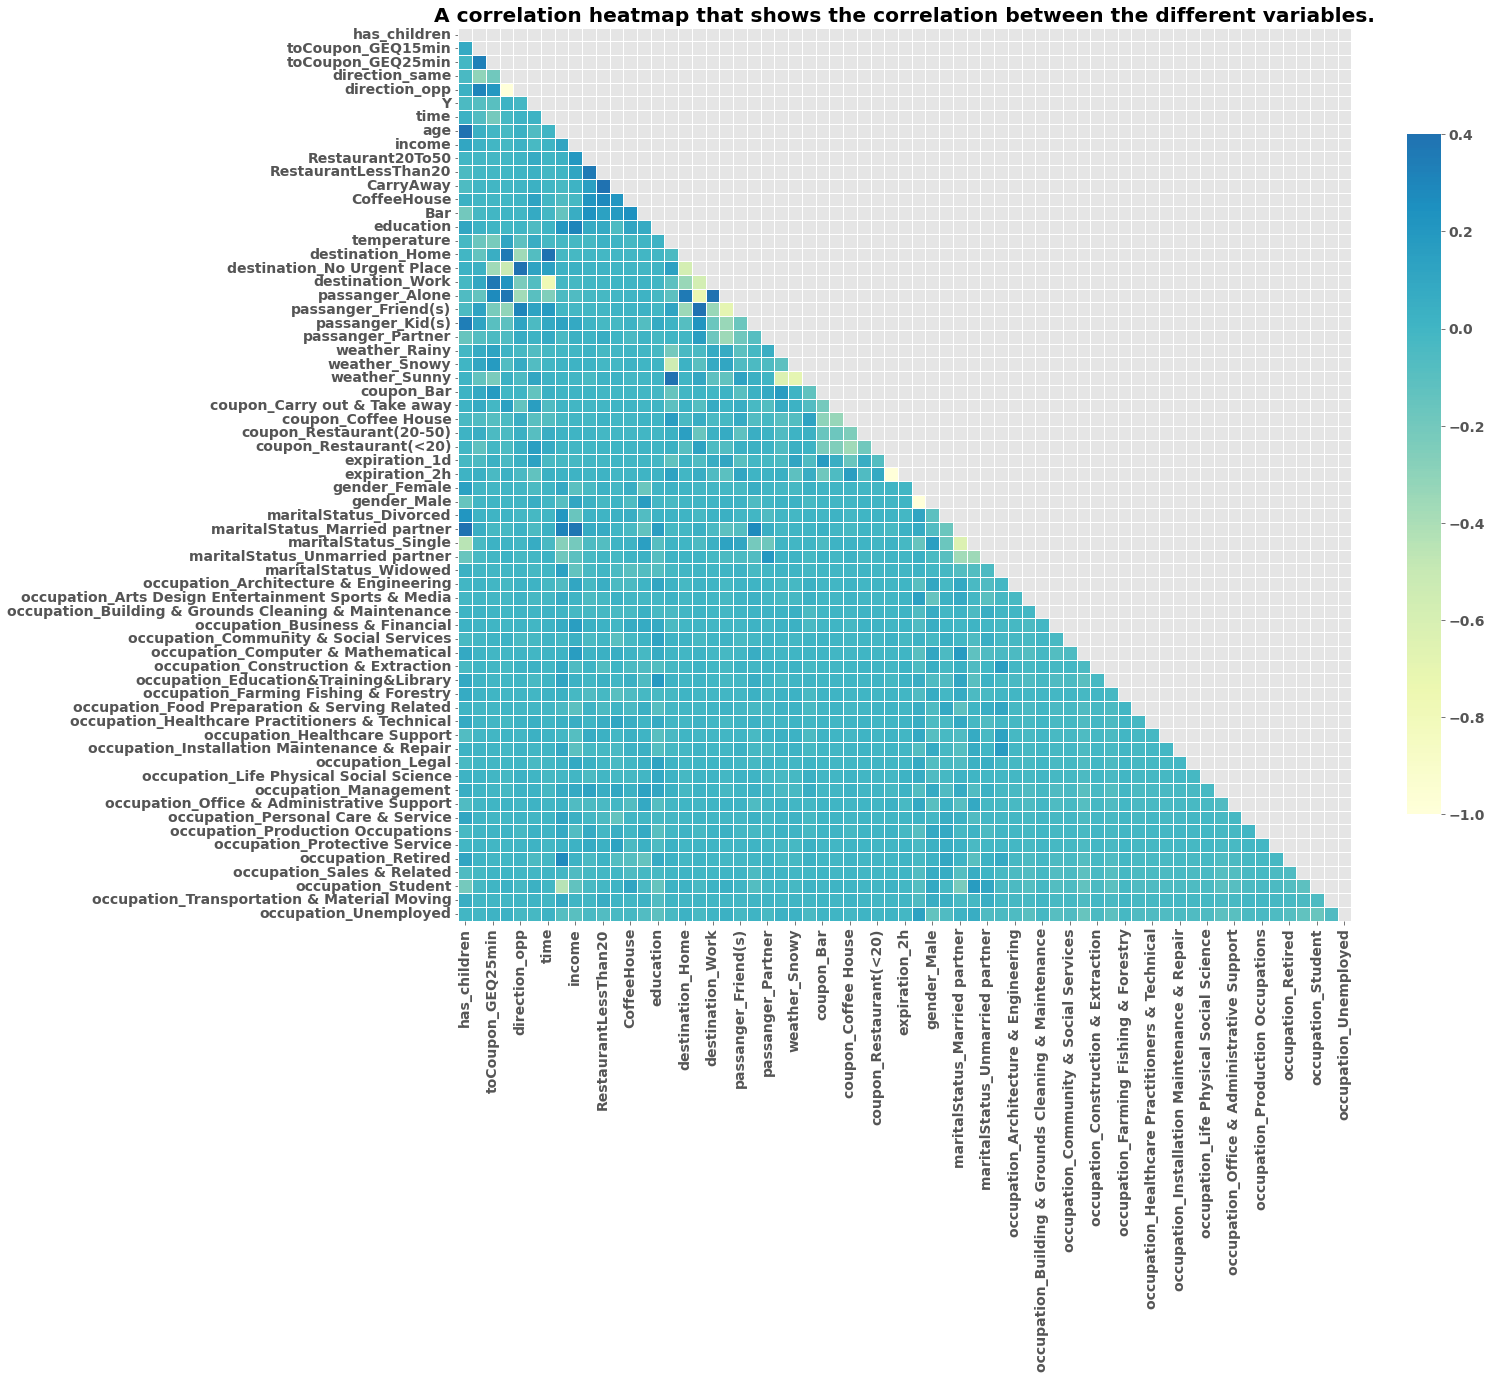

In [77]:
plt.rcParams.update({'font.size': 14}) # set the font size, this must be set at the top
corr = df_ver4.corr(method = 'spearman')

# derive a mask for the top triangle
corrMask = np.zeros_like(corr, dtype=bool)

corrMask[np.triu_indices_from(corrMask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 25))

# graph the heatmap with the correlation mask
sns.heatmap(corr, mask=corrMask, cmap="YlGnBu", vmax=.40, center=0, square=True, linewidths=.7, cbar_kws={"shrink": .5})
plt.title('A correlation heatmap that shows the correlation between the different variables.')

In [78]:
#### let's separate the target from rest of the data set.

In [79]:
target  = df_ver4['Y']

In [80]:
target.head() # display the five records

22    1
23    0
24    1
25    0
26    0
Name: Y, dtype: int64

#### let's drop the target from the main data set 

In [81]:
df_ver4.drop('Y', axis = 1, inplace = True)

In [82]:
# look at the meta data our data frame
df_ver4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 64 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   has_children                                          12079 non-null  int64
 1   toCoupon_GEQ15min                                     12079 non-null  int64
 2   toCoupon_GEQ25min                                     12079 non-null  int64
 3   direction_same                                        12079 non-null  int64
 4   direction_opp                                         12079 non-null  int64
 5   time                                                  12079 non-null  int32
 6   age                                                   12079 non-null  int32
 7   income                                                12079 non-null  int32
 8   Restaurant20To50                                      12079 non-null  int32

#### Split the transformed data set into training and tests stes (using 80% - 20% randomized split) using the train_test_split module from sklearn.model_selection package.

In [83]:
vs_train, vs_test,  vs_target_train, vs_target_test = train_test_split(df_ver4, target, test_size = 0.2, random_state = 33)

In [84]:
print(vs_train.shape)
vs_train[0:5]  # display the first five records

(9663, 64)


,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,time,age,income,Restaurant20To50,RestaurantLessThan20,...,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
3321,1,1,0,0,1,3,4,8,1,2,...,0,0,0,0,0,0,0,0,0,0
11561,1,0,0,0,1,3,3,4,1,2,...,0,0,0,0,0,0,0,0,0,0
9868,0,0,0,1,0,3,4,2,1,1,...,0,1,0,0,0,0,0,0,0,0
8929,0,1,0,1,0,0,4,0,1,3,...,0,0,0,0,0,0,0,0,0,1
1799,1,1,0,0,1,3,4,7,1,2,...,0,0,0,0,0,0,0,0,0,1


In [85]:
print(vs_test.shape)
vs_test[0:5] # display the first five records

(2416, 64)


,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,time,age,income,Restaurant20To50,RestaurantLessThan20,...,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
1784,0,0,0,1,0,0,1,1,2,3,...,0,0,0,0,0,0,0,1,0,0
3973,0,0,0,1,0,0,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
5221,1,1,0,0,1,1,3,2,1,3,...,0,0,0,0,0,0,0,0,0,0
2915,0,1,0,0,1,0,1,2,1,2,...,0,0,0,0,0,0,0,0,0,0
2501,0,1,0,0,1,2,1,8,0,1,...,0,0,0,0,0,0,0,1,0,0


In [86]:
print(vs_target_train.shape)
vs_target_train[0:5] # display the first five records

(9663,)


3321     0
11561    1
9868     1
8929     0
1799     0
Name: Y, dtype: int64

In [87]:
print(vs_target_test.shape)
vs_target_test[0:5] # display the first five records

(2416,)


1784    1
3973    1
5221    0
2915    0
2501    1
Name: Y, dtype: int64

#### let's normalize the data so that all attributes are in the same scale (between 0 and 1).
<p>Using the preprocessing module from sklearn, perform min-max normalization to rescale the numeric attributes.<p>

In [88]:
min_max_scaler = preprocessing.MinMaxScaler().fit(vs_train)
vs_train_norm = min_max_scaler.transform(vs_train)
vs_test_norm = min_max_scaler.transform(vs_test)

In [89]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)
vs_train_norm[0:5] # view the first five records

array([[1.  , 1.  , 0.  , 0.  , 1.  , 0.75, 0.57, 1.  , 0.25, 0.5 , 0.5 ,
        0.75, 0.25, 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  ,
        0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  ,
        1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 1.  , 0.75, 0.43, 0.5 , 0.25, 0.5 , 0.75,
        1.  , 0.5 , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ,
        1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.75, 0.57, 0.25, 0.25, 0.25, 0.25,
        0.  , 0.25, 0.4 , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  

In [90]:
vs_test_norm[0:5] # view the first five records

array([[0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.14, 0.12, 0.5 , 0.75, 0.75,
        0.5 , 0.75, 0.4 , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.14, 0.12, 0.5 , 0.5 , 1.  ,
        0.5 , 0.  , 0.8 , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  ,
        0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 1.  , 0.  , 0.  , 1.  , 0.25, 0.43, 0.25, 0.25, 0.75, 0.75,
        0.5 , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  

### K-Modes Clustering

### Using Kmodes with cao initialization

In [91]:
kmode_cl =KModes(n_clusters = 2, init = 'cao', n_init = 1, verbose = 1)

Wall time: 0 ns


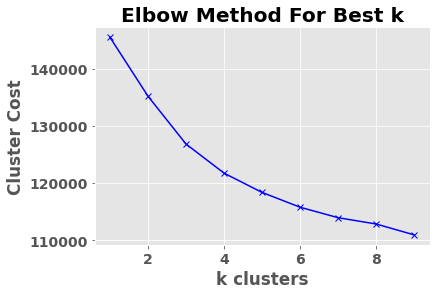

In [92]:
%time
cluster_cost = []
K = range(1,10)
for num in list(K):
    
    kmode_cl =KModes(n_clusters = num, init = 'cao', n_init = 1)
    kmode_cl.fit_predict(vs_train_norm)
    cluster_cost.append(kmode_cl.cost_)
    
plt.plot(K, cluster_cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cluster Cost')
plt.title('Elbow Method For Best k')
plt.show()

<p>Our best k is between 4 and 5 inclusive. </p>

In [93]:
# when k = 4
kmode_cl = KModes(n_clusters = 4, init = 'cao', n_init = 1, verbose = 1)
labels = kmode_cl.fit_predict(vs_train_norm)
labels

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3272, cost: 121742.0
Run 1, iteration: 2/100, moves: 814, cost: 121742.0


array([0, 1, 1, ..., 1, 0, 3], dtype=uint16)

#### let's assign the different cluster labels to our the vs_train data set when k = 4

In [94]:
vs_train['cluster'] = labels
vs_train['cluster'].value_counts()

0    3365
3    2438
1    2140
2    1720
Name: cluster, dtype: int64

In [95]:
print('Cluster ClusterSize:')
vs_train['cluster'].value_counts()

Cluster ClusterSize:


0    3365
3    2438
1    2140
2    1720
Name: cluster, dtype: int64

<p>When k = 4, we get the following cluster sizes of the different clusters: <p>
<ul>
<li>Cluster 0: 3365</li>
<li>Cluster 1: 2438</li>
<li>Cluster 2: 2140</li>
<li>Cluster 3: 1720</li>
<ul>

In [126]:
# when k = 5
kmode_cl = KModes(n_clusters = 5, init = 'cao', n_init = 50, verbose = 1)
labels = kmode_cl.fit_predict(vs_train_norm)
labels

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3669, cost: 118370.0
Run 1, iteration: 2/100, moves: 877, cost: 118370.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3669, cost: 118370.0
Run 2, iteration: 2/100, moves: 877, cost: 118370.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3669, cost: 118370.0
Run 3, iteration: 2/100, moves: 877, cost: 118370.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3669, cost: 118370.0
Run 4, iteration: 2/100, moves: 877, cost: 118370.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3669, cost: 118370.0
Run 5, iteration: 2/100, moves: 877, cost: 118370.0
Init: initializing centroids
Init: initializing clusters
Starting iteration

Init: initializing clusters
Starting iterations...
Run 45, iteration: 1/100, moves: 3669, cost: 118370.0
Run 45, iteration: 2/100, moves: 877, cost: 118370.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 46, iteration: 1/100, moves: 3669, cost: 118370.0
Run 46, iteration: 2/100, moves: 877, cost: 118370.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 47, iteration: 1/100, moves: 3669, cost: 118370.0
Run 47, iteration: 2/100, moves: 877, cost: 118370.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 48, iteration: 1/100, moves: 3669, cost: 118370.0
Run 48, iteration: 2/100, moves: 877, cost: 118370.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 49, iteration: 1/100, moves: 3669, cost: 118370.0
Run 49, iteration: 2/100, moves: 877, cost: 118370.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 50, iterat

array([0, 0, 1, ..., 1, 4, 3], dtype=uint16)

#### let's assign the different cluster labels to our the vs_train data set when k = 5

In [127]:
vs_train['cluster_K5'] = labels

In [128]:
print('Cluster ClusterSize:')
vs_train['cluster_K5'].value_counts()

Cluster ClusterSize:


0    2639
1    1998
3    1866
2    1652
4    1508
Name: cluster_K5, dtype: int64

<p>When k = 5, we get the following cluster sizes of the different clusters: <p>
<ul>
<li>Cluster 0: 2639</li>
<li>Cluster 1: 1998</li>
<li>Cluster 2: 1866</li>
<li>Cluster 3: 1652</li>
<li>Cluster 4: 1508</li>
<ul>

#### Let's measure the homogenity and completness when k is either 4 or 5 to determine whick k gives us the best clusters

In [129]:
# when k = 5
label_k4 = vs_train['cluster'].astype(int)
label_k4[0:4] # display the first 3 records

3321     0
11561    1
9868     1
8929     0
Name: cluster, dtype: int32

In [118]:
type(vs_target_train)

pandas.core.series.Series

#### let's convert vs_target_train into a numpy array

In [120]:
vs_target_train_array = np.array(vs_target_train)

In [121]:
print(completeness_score(vs_target_train_array, label_k4))

0.003140301246210281


In [122]:
print(homogeneity_score(vs_target_train_array, label_k4))

0.0062275192129990315


<p>The completeness score doesn't approach 1 when most of the data points that are members of a given class are elements of the same class. </p>
<p>The same that applies to the homogeneity score; it doesn't approach 1 when all the clusters contain almost only data points that are member of a single class.</p>

<p>The scores we got are extremely too low. </p>

In [130]:
# when k = 5
label_k5 = vs_train['cluster_K5'].astype(int)
label_k5[0:4] # display the first 3 records

3321     0
11561    0
9868     1
8929     0
Name: cluster_K5, dtype: int32

In [131]:
print(completeness_score(vs_target_train_array, label_k5))

0.005452669618691898


In [132]:
print(homogeneity_score(vs_target_train_array, label_k5))

0.012678596177913023


<p>The completeness score doesn't approach 1 when most of the data points that are members of a given class are elements of the same class. </p>
<p>The same that applies to the homogeneity score; it doesn't approach 1 when all the clusters contain almost only data points that are member of a single class.</p>

<p>The scores we got are extremely too low. </p>
<p>Compared to the scores of k = 4, K = 5 performs slighly better. </p>

### Using Kmodes with Huang initialization

### We shall look at the K - prototype

In [100]:
#Hopkins Statistic is a way of measuring the cluster tendency of a data set.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [101]:
#### Feature Extraction

# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [102]:
# # Feature extraction
# model = LogisticRegression()
# rfe = RFE(model, 3)
# fit = rfe.fit(X, Y)
# print("Num Features: %s" % (fit.n_features_))
# print("Selected Features: %s" % (fit.support_))
# print("Feature Ranking: %s" % (fit.ranking_))

In [103]:
# df=pd.DataFrame({"one":[1,2,3,4,5],"two":[6,7,8,9,10]})

# df["one"].apply(lambda x: x*10 if x<2 elif x<4 x**2 else x+10)

In [135]:
 categoricalds = vs_train[['time', 'age', 'income', 'Restaurant20To50', 'RestaurantLessThan20', 'CarryAway', 'CoffeeHouse', 'Bar', 'education', 'temperature']]

In [138]:
 categoricalds_array = np.array(categoricalds)

In [136]:
 categoricalds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9663 entries, 3321 to 7514
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   time                  9663 non-null   int32
 1   age                   9663 non-null   int32
 2   income                9663 non-null   int32
 3   Restaurant20To50      9663 non-null   int32
 4   RestaurantLessThan20  9663 non-null   int32
 5   CarryAway             9663 non-null   int32
 6   CoffeeHouse           9663 non-null   int32
 7   Bar                   9663 non-null   int32
 8   education             9663 non-null   int32
 9   temperature           9663 non-null   int32
dtypes: int32(10)
memory usage: 453.0 KB


In [137]:
from kmodes.kprototypes import KPrototypes

Wall time: 0 ns


<function matplotlib.pyplot.show(close=None, block=None)>

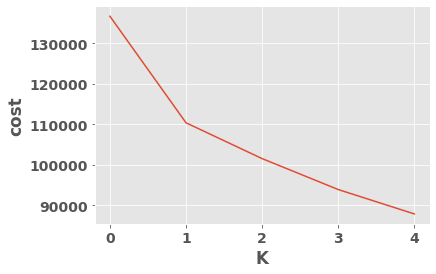

In [140]:
%time
#Choosing optimal K value
cost = []
X = categoricalds_array 
for num_clusters in list(range(2,7)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42, n_jobs=-2, max_iter=15, n_init=30) 
    kproto.fit_predict(X, categorical=[0])
    cost.append(kproto.cost_)

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show